In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def filter_data_for_year(df, year):
    selected_columns = ['Country Name', 'Indicator Name', str(year)]
    filtered_df = df[selected_columns]
    pivoted_df = filtered_df.pivot(index='Country Name', columns='Indicator Name', values=str(year))
    return pivoted_df

In [55]:
def readFile(filename,cntry_list,indicator):
    df=pd.read_excel(filename,skiprows=2,header=1)
    ref_df=df[(df['Country Name'].isin(cntry_list)) & (df['Indicator Name']==indicator)]
    ref_df=ref_df.drop(df.columns[1:4],axis=1)
    yr=[str(year) for year in range(1960,2011)] + [str(year) for year in range(2021,2023)]
    final_df=ref_df.drop(columns=yr)
    final_df=final_df.reset_index(drop=True)
    trans_df=final_df.transpose()
    trans_.columns=trans_df.iloc[0]
    trans_df=trans_df[1:]
    trans_df.index.names=['Years']
    return final_df,trans_df

In [56]:
file='API_6_DS2_en_excel_v2_6010484.xls'
df=readFile(file,cntry_list,'Forest area (% of land area)')
df[0]

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,61.023328,60.839175,60.655021,60.470868,60.286715,60.071033,59.832881,59.708428,59.558526,59.417478
1,China,21.574627,21.780926,21.987224,22.193523,22.399821,22.630498,22.830707,23.030912,23.231118,23.431323
2,United Kingdom,12.723515,12.802877,12.882239,12.961600,13.040962,13.057496,13.078163,13.115364,13.152565,13.185632
3,India,23.463822,23.553422,23.643023,23.732624,23.822225,23.911825,24.001426,24.091027,24.180628,24.270228
4,Russian Federation,49.771084,49.768579,49.766073,49.763568,49.761063,49.772700,49.784336,49.784336,49.784336,49.784336


In [57]:
df[1]

Country Name,Brazil,China,United Kingdom,India,Russian Federation
Years,,,,,
2011,61.023328,21.574627,12.723515,23.463822,49.771084
2012,60.839175,21.780926,12.802877,23.553422,49.768579
2013,60.655021,21.987224,12.882239,23.643023,49.766073
2014,60.470868,22.193523,12.9616,23.732624,49.763568
2015,60.286715,22.399821,13.040962,23.822225,49.761063
2016,60.071033,22.630498,13.057496,23.911825,49.7727
2017,59.832881,22.830707,13.078163,24.001426,49.784336
2018,59.708428,23.030912,13.115364,24.091027,49.784336
2019,59.558526,23.231118,13.152565,24.180628,49.784336


In [4]:
df = pd.read_excel(r"C:\Users\sandr\Documents\ADS1-2\API_6_DS2_en_excel_v2_6010484.xls",skiprows=2,header=1)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Mortality rate attributed to unsafe water, uns...",SH.STA.WASH.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,People using safely managed sanitation service...,SH.STA.SMSS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,Mortality rate attributed to unintentional poi...,SH.STA.POIS.P5.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cntry_list=['Brazil','Russian Federation','India','China','United Kingdom']

In [5]:
ind_list=['Access to electricity (% of population)','CO2 emissions (kt)',
          'Forest area (% of land area)','Arable land (% of land area)','Agricultural land (% of land area)']

In [12]:
yr=[str(year) for year in range(1960,2011)] + [str(year) for year in range(2021,2023)]
#yr

In [13]:
cntry_df=df[df['Country Name'].isin(cntry_list)]
ind_df=cntry_df[cntry_df['Indicator Name'].isin(ind_list)]

data=cntry_df.drop(columns=yr)
#data


In [64]:
dfs=[]
for ind in ind_list:
    df_name = data.loc[df['Indicator Name'] == ind]
    dfs.append(df_name)  


In [65]:
new_df_names = [ind.split(' ')[0] + '_df' for ind in ind_list]
new_df_list = []
df_dict={'Access to electricity (% of population)':dfs[0],'CO2 emissions (kt)':dfs[1],
          'Forest area (% of land area)':dfs[2],'Arable land (% of land area)':dfs[3],'Agricultural land (% of land area)':dfs[4]}
for ind, new_df_name in zip(ind_list, new_df_names):
    if ind in df_dict:
        globals()[new_df_name] = df_dict[ind]
        new_df_list.append(globals()[new_df_name])

In [78]:
#Access_df

In [67]:
df1 = df_dict["Access to electricity (% of population)"].drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1)

In [68]:
df1=df1.reset_index(drop=True)

In [69]:
df1=df1.transpose()


In [70]:
df1.columns=df1.iloc[0]
df1=df1[1:]
df1.index.names=['Years']

In [79]:
df1

Country Name,Brazil,China,United Kingdom,India,Russian Federation
Years,,,,,
2011,99.328691,99.887207,100.0,79.516785,99.20948
2012,99.519494,99.947433,100.0,79.9,100.0
2013,99.575151,99.99295,100.0,83.131393,100.0
2014,99.650247,100.0,100.0,85.133911,100.0
2015,99.710902,100.0,100.0,88.0,95.5
2016,99.7,100.0,100.0,89.586304,99.410225
2017,99.8,100.0,100.0,91.794159,100.0
2018,99.7,100.0,100.0,95.7,100.0
2019,99.8,100.0,100.0,95.885941,99.777969


In [71]:
df1.describe()

Country Name,Brazil,China,United Kingdom,India,Russian Federation
count,10.0,10.0,10.0,10.000000,10.0
unique,8.0,4.0,1.0,10.000000,6.0
top,99.7,100.0,100.0,79.516785,100.0
freq,2.0,7.0,10.0,1.000000,5.0


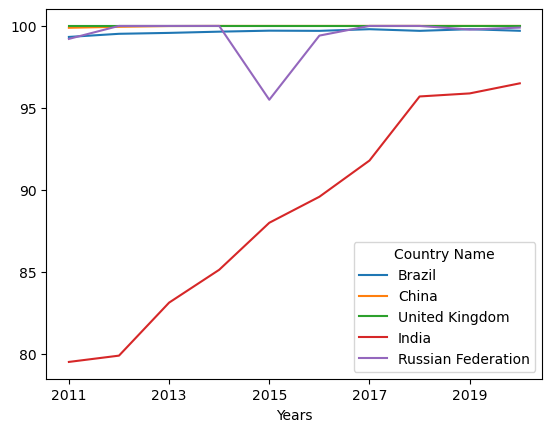

In [115]:
df1.plot(kind='line')
plt.show()

===============================================

In [7]:
def filter_data_for_year(df, year):
    selected_columns = ['Country Name', 'Indicator Name', str(year)]
    filtered_df = df[selected_columns]
    pivoted_df = filtered_df.pivot(index='Country Name', columns='Indicator Name', values=str(year))
    return pivoted_df

In [14]:
filtered_data = filter_data_for_year(ind_df, 2020)
filtered_data

Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),Arable land (% of land area),CO2 emissions (kt),Forest area (% of land area)
Country Name,,,,,
Brazil,99.702713,28.564619,6.895108,414138.8,59.417478
China,100.000000,55.462649,11.606259,10944686.2,23.431323
India,96.500000,60.045863,51.946881,2200836.3,24.270228
Russian Federation,99.897781,13.158436,7.428098,1618271.0,49.784336
United Kingdom,100.000000,71.340049,24.711703,308650.3,13.185632


In [99]:
filtered_data.describe()

Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),Arable land (% of land area),CO2 emissions (kt),Forest area (% of land area)
count,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,99.220099,45.714323,20.517610,3.097317e+06,34.017800
std,1.525418,24.036945,18.984925,4.459500e+06,19.588231
min,96.500000,13.158436,6.895108,3.086503e+05,13.185632
25%,99.702713,28.564619,7.428098,4.141388e+05,23.431323
50%,99.897781,55.462649,11.606259,1.618271e+06,24.270228
75%,100.000000,60.045863,24.711703,2.200836e+06,49.784336
max,100.000000,71.340049,51.946881,1.094469e+07,59.417478


In [100]:
filtered_data.corr()

Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),Arable land (% of land area),CO2 emissions (kt),Forest area (% of land area)
Indicator Name,,,,,
Access to electricity (% of population),1.000000,-0.284553,-0.903098,0.150183,0.208782
Agricultural land (% of land area),-0.284553,1.000000,0.619494,0.201405,-0.916247
Arable land (% of land area),-0.903098,0.619494,1.000000,-0.159133,-0.572612
CO2 emissions (kt),0.150183,0.201405,-0.159133,1.000000,-0.308272
Forest area (% of land area),0.208782,-0.916247,-0.572612,-0.308272,1.000000


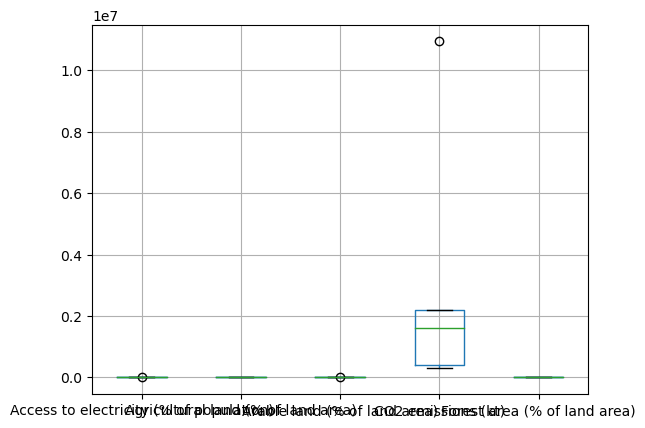

In [103]:
filtered_data.boxplot(column=['Access to electricity (% of population)', 'Agricultural land (% of land area)', 'Arable land (% of land area)', 'CO2 emissions (kt)', 'Forest area (% of land area)'])

plt.show()

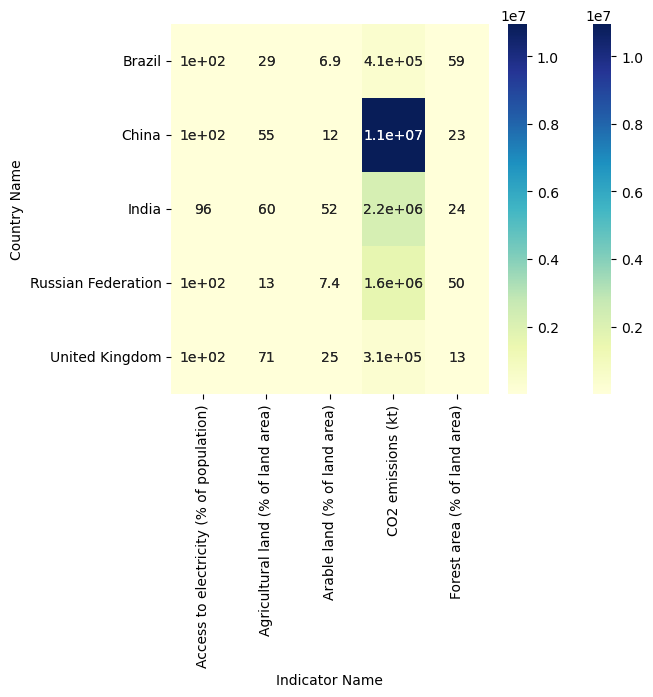

In [105]:
sns.heatmap(filtered_data, annot=True, cmap='YlGnBu')
plt.show()

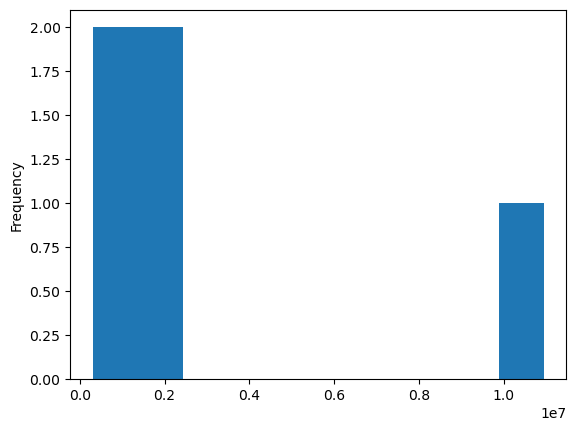

In [107]:
filtered_data['CO2 emissions (kt)'].plot(kind='hist',bins=10)
plt.show()

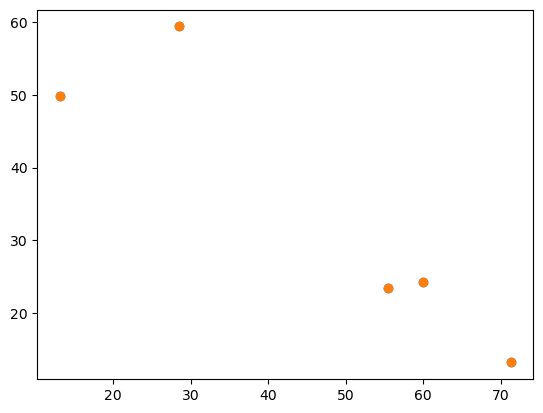

In [109]:
plt.scatter(filtered_data['Agricultural land (% of land area)'], filtered_data['Forest area (% of land area)'])
plt.show()

In [96]:
# s_yr=2020
# mask=cntry_df[str(s_yr)].notna()
# df_syr=cntry_df[mask]
# df_syr=df_syr.reset_index(drop=True)
# df_syr.head()
# #df_syr = df_syr.set_axis(df_syr['Indicator Name'], axis='columns')

In [72]:
# for i in range(0,len(ind_list)+1):
#     #print(i)
#     for j in ind_list:
#         print(i,j)
#         dfs[i]=j.split(' ')[0]
#         print(dfs[i])
#         print('-------------')

In [73]:
#df=pd.read_excel(r"C:\Users\sandr\Documents\ADS1-2\API_6_DS2_en_excel_v2_6010484.xls")
#df=df.reset_index(drop=True)
#df=df.transpose()
#df = df.rename(columns=df.iloc[0])
#df = df.drop(df.iloc[0,1],axis='columns')
#df=df.reset_index(drop=True)
#df

In [74]:
#df['Indicator Name'].to_list()[:141]

In [75]:
#df.head()

In [76]:
#df.loc[df['Country Name'] == 'India']

In [77]:
#df.loc[df['Indicator Name']=='Agricultural land (% of land area)']